# 군집화(Clustering) - k-Means Algorithm

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [23]:
from sklearn.datasets import load_iris
iris = load_iris()
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
iris_std = StandardScaler().fit_transform(iris.data)
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
iris_pca = pca.fit_transform(iris_std) 

In [24]:
pca.explained_variance_ratio_ # .주성분의 첫번째 성분은 72퍼센트를 말해주고 두번째 성분은 23프로를 말해준다 

array([0.72962445, 0.22850762])

In [25]:
df = pd.DataFrame(iris.data, columns=['si','sw','pl','pw'] )
df['PC1'] = iris_pca[:,0]
df['PC2'] = iris_pca[:,1]
df.head(3)

,si,sw,pl,pw,PC1,PC2
0,5.1,3.5,1.4,0.2,-2.264703,0.480027
1,4.9,3.0,1.4,0.2,-2.080961,-0.674134
2,4.7,3.2,1.3,0.2,-2.364229,-0.341908


- K-Means 모델 생성/학습

In [21]:
from sklearn.cluster import KMeans
Kmeans = KMeans(n_clusters=3,random_state=2021)

In [26]:
Kmeans.fit(iris_std) # 정규분포로 데이터를 줘야한다

KMeans(n_clusters=3, random_state=2021)

In [27]:
Kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

In [29]:
df['target'] = iris.target
df['cluster'] = Kmeans.labels_
df.tail()

,si,sw,pl,pw,PC1,PC2,target,cluster
145,6.7,3.0,5.2,2.3,1.870503,0.386966,2,0
146,6.3,2.5,5.0,1.9,1.564580,-0.896687,2,2
147,6.5,3.0,5.2,2.0,1.521170,0.269069,2,0
148,6.2,3.4,5.4,2.3,1.372788,1.011254,2,0
149,5.9,3.0,5.1,1.8,0.960656,-0.024332,2,2


In [30]:
df.groupby(['target','cluster']).count()

si  sw  pl  pw  PC1  PC2
target cluster                          
0      1        50  50  50  50   50   50
1      0        11  11  11  11   11   11
       2        39  39  39  39   39   39
2      0        36  36  36  36   36   36
       2        14  14  14  14   14   14

- 데이터 시각화

In [144]:
df.iloc[:,-1 * 1]

0      1
1      1
2      1
3      1
4      1
      ..
145    0
146    2
147    0
148    0
149    2
Name: cluster, Length: 150, dtype: int32

In [89]:
df.head()

,si,sw,pl,pw,PC1,PC2,target,cluster
0,5.1,3.5,1.4,0.2,-2.264703,0.480027,0,1
1,4.9,3.0,1.4,0.2,-2.080961,-0.674134,0,1
2,4.7,3.2,1.3,0.2,-2.364229,-0.341908,0,1
3,4.6,3.1,1.5,0.2,-2.299384,-0.597395,0,1
4,5.0,3.6,1.4,0.2,-2.389842,0.646835,0,1


In [123]:
for i in range(1,3):
    print(df.iloc[:,[-1 * i]])

     cluster
0          1
1          1
2          1
3          1
4          1
..       ...
145        0
146        2
147        0
148        0
149        2

[150 rows x 1 columns]
     target
0         0
1         0
2         0
3         0
4         0
..      ...
145       2
146       2
147       2
148       2
149       2

[150 rows x 1 columns]


- 두개의 그림 비교 

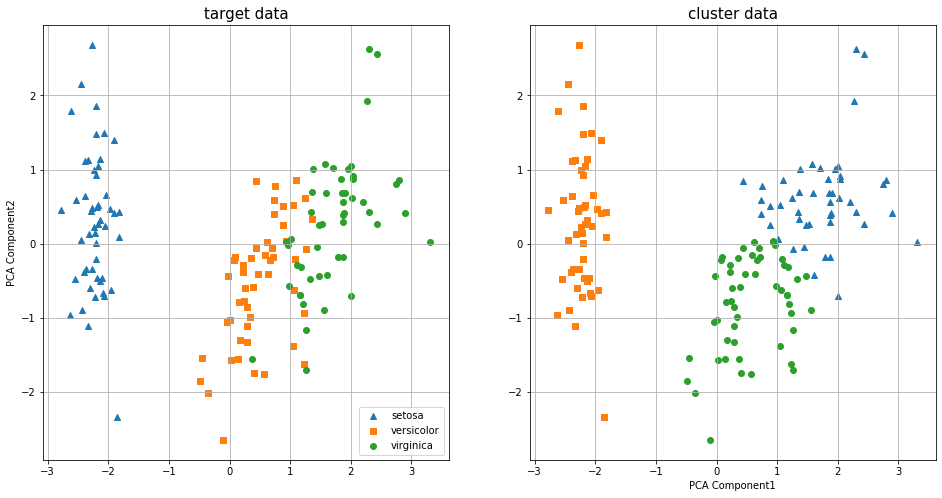

In [184]:
markers = ['^','s','o']

# for i in range(3):
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(16,8))
for k, column in enumerate(['target','cluster']):
    ax = axs[k]
    for i,marker in enumerate(markers):
        x_axis_data = df[df[column] == i]['PC1']
        y_axis_data = df[df[column] == i]['PC2']
        ax.scatter(x_axis_data,y_axis_data,marker=marker,label=iris.target_names[i])
        if column =='target':
            ax.set_title(f'{column} data',fontsize=15)
            ax.set_ylabel('PCA Component2')
            ax.legend()
            ax.grid()
        elif column =='cluster':
            ax.set_title(f'{column} data',fontsize=15)
            ax.set_xlabel(f'PCA Component1')
            ax.grid()
plt.show()




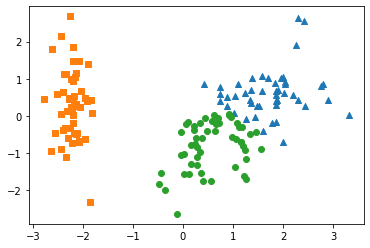

In [103]:
# 군집화한 결과를 차원축소하여 시각화
markers = ['^','s','o']

for i,marker in enumerate(markers):
    x_axis_data = df[df.cluster == i]['PC1']
    y_axis_data = df[df.cluster == i]['PC2']
    plt.scatter(x_axis_data,y_axis_data,marker=marker)


# plt.xlabel('PCA Component1')
# plt.ylabel('PCA Component2')
# plt.title('Clusterd Data',fontsize=15)
# plt.grid()
# plt.show()


# for i,marker in enumerate(markers):
#     x_axis_data1 = df[df.target == i]['PC1']
#     y_axis_data1 = df[df.target == i]['PC2']
#     plt.scatter(x_axis_data1,y_axis_data1,marker=marker,label=iris.target_names[i])
                
# plt.legend() # 범례
# plt.xlabel('PCA Component 1')
# plt.ylabel('PCA Component 2')
# plt.title('IRis data',fontsize = 15)
# plt.grid()
# plt.show()


In [67]:
df.head()

,si,sw,pl,pw,PC1,PC2,target,cluster
0,5.1,3.5,1.4,0.2,-2.264703,0.480027,0,1
1,4.9,3.0,1.4,0.2,-2.080961,-0.674134,0,1
2,4.7,3.2,1.3,0.2,-2.364229,-0.341908,0,1
3,4.6,3.1,1.5,0.2,-2.299384,-0.597395,0,1
4,5.0,3.6,1.4,0.2,-2.389842,0.646835,0,1


In [76]:
i= 1
df.iloc[:,[-1*i]]

,cluster
0,1
1,1
2,1
3,1
4,1
...,...
145,0
146,2
147,0
148,0


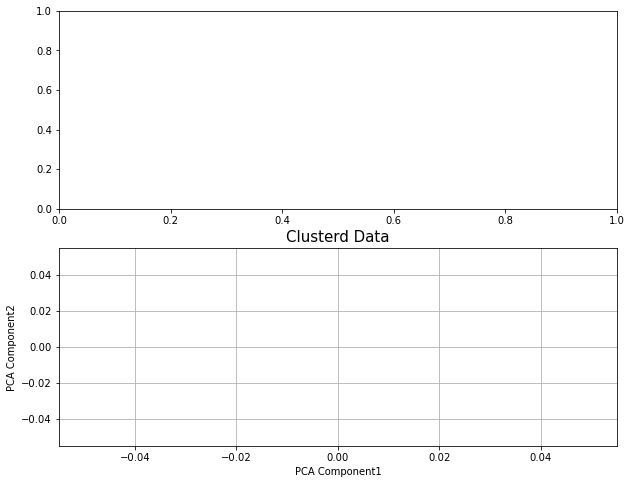

In [81]:
import seaborn as sns
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(10,8))
for i,marker in enumerate(markers):    
    row, col = i//2, i%2
    y_axis_data = df[df.iloc[:,[-1*i]] == i]['PC2']
    plt.scatter(x_axis_data,y_axis_data,marker=marker)

plt.xlabel('PCA Component1')
plt.ylabel('PCA Component2')
plt.title('Clusterd Data',fontsize=15)
plt.grid()
plt.show()